In [1]:
#pip install numpy # You may need to install numpy independently.

In [2]:
#pip install VCF-kit

In [3]:
#pip install pandas

In [4]:
#pip install gzip

In [5]:
import gzip

In [6]:
import pandas as pd
import gzip

def get_vcf_names(vcf_path):
    with gzip.open(vcf_path, "rt") as ifile:
          for line in ifile:
            if line.startswith("#CHROM"):
                  vcf_names = [x for x in line.split('\t')]
                  break
    ifile.close()
    return vcf_names


names = get_vcf_names('/home/kate/Documents/mnm/split_chr/CPCT02220079.annotated.processed_reheader_chr12_sort.vcf.gz')
vcf = pd.read_csv('/home/kate/Documents/mnm/split_chr/CPCT02220079.annotated.processed_reheader_chr12_sort.vcf.gz', compression='gzip', comment='#', delim_whitespace=True, header=None, names=names) #, chunksize=10000


In [33]:
#Utworzyc liste dlugosci dla insercji/delecji
#insertions = []
#deletions = []
indels = []

record = 1
while record<len(vcf.ALT): #len(vcf.ALT)
#    print(record)
#    print(len(vcf.ALT[record]))
    if len(vcf.ALT[record])>len(vcf.REF[record]): 
        indels.append(len(vcf.ALT[record]))
    elif len(vcf.ALT[record])<len(vcf.REF[record]):
        indels.append(len(vcf.ALT[record]))
#    if len(vcf.ALT[record])>len(vcf.REF[record]):
#        insertions[record] = len(vcf.ALT[record])
#        insertions.append(len(vcf.ALT[record]))
#    elif len(vcf.ALT[record])<len(vcf.REF[record]):
#        deletions[record] = len(vcf.ALT[record])
#        deletions.append(len(vcf.ALT[record]))
    record=record+1

In [11]:
deletions.count(1)

22846

In [40]:
indels_count = []
indels_number = []

for n in list(set(indels)):
    indels_number.append(n)
    indels_count.append(indels.count(n))
    
#insertions_count = []


In [47]:
indels_data = {'Number': indels_number, 'Count': indels_count}  
indels_number_data = {'chr12': indels}
indels_df = pd.DataFrame(indels_number_data)  

In [48]:
indels_df

,chr12
0,1
1,20
2,1
3,1
4,1
...,...
42433,7
42434,1
42435,3
42436,1


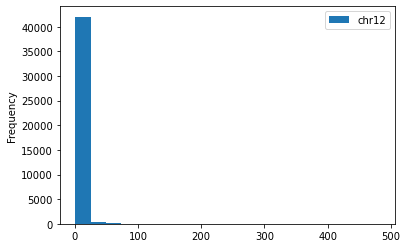

In [51]:
ax = indels_df.plot.hist(bins=0)

In [52]:
max(indels_df.chr12)

482

In [74]:
chromosomes = ["chr" + str(chr) for chr in range(1,23)]

In [75]:
print(chromosomes)

['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22']


In [92]:
chromosomes_df = df = pd.DataFrame({"chr":chromosomes})

In [90]:
#chromosomes_df = df = pd.DataFrame(chromosomes)

In [99]:
chromosomes_add = ["chrMT", "chrX", "chrY"]
#chromosomes_add_df = pd.DataFrame("chr":chromosomes_add)
#chromosomes_df.append(chromosomes_add_df, ignore_index = True)
#chromosomes_df
chrom = chromosomes + chromosomes_add

In [100]:
chrom

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chrMT',
 'chrX',
 'chrY']

In [151]:
#indels_df = pd.DataFrame()
indels_number_data = {}

In [161]:
for ch in chrom:
    #print('/home/kate/Documents/mnm/split_chr/CPCT02220079.annotated.processed_reheader_chr1_sorted.vcf.gz')
    names = get_vcf_names('/home/kate/Documents/mnm/split_chr/CPCT02220079.annotated.processed_reheader_' + ch + '_sorted.vcf.gz')
    vcf = pd.read_csv('/home/kate/Documents/mnm/split_chr/CPCT02220079.annotated.processed_reheader_' + ch + '_sorted.vcf.gz', compression='gzip', comment='#', delim_whitespace=True, header=None, names=names) #, chunksize=10000
    
    #extracting indels
    indels = []

    record = 1
    while record<len(vcf.ALT): #len(vcf.ALT)
    #    print(record)
    #    print(len(vcf.ALT[record]))
        if len(vcf.ALT[record])>len(vcf.REF[record]): 
            indels.append(len(vcf.ALT[record]))
        elif len(vcf.ALT[record])<len(vcf.REF[record]):
            indels.append(len(vcf.ALT[record]))
        record=record+1
        
    #Extract indels data
    indels_number_data[ch] = indels

In [162]:
indels_df = pd.DataFrame.from_dict(indels_number_data, orient='index').T

In [163]:
indels_df

,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,...,chr16,chr17,chr18,chr19,chr20,chr21,chr22,chrMT,chrX,chrY
0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,3.0,1.0,1.0,11.0,1.0,9.0,2.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,2.0,7.0,1.0,9.0,NaN,2.0,9.0
2,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,1.0,3.0
3,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,1.0,1.0,1.0,NaN,123.0,1.0
4,2.0,4.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,2.0,...,17.0,3.0,1.0,1.0,2.0,2.0,1.0,NaN,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72776,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72777,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72778,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72779,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


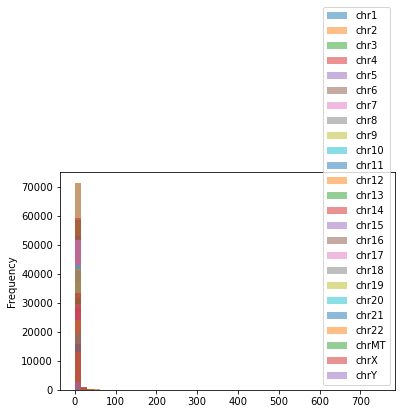

In [164]:
ax = indels_df.plot.hist(bins=50, alpha=0.5)

In [165]:
indels_df.to_csv('/home/kate/Documents/mnm/zadanie4_out.tsv', sep = '\t')